In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pylab

from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage

pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
#-------------TEMPLATE MATCHING-----------------------------------

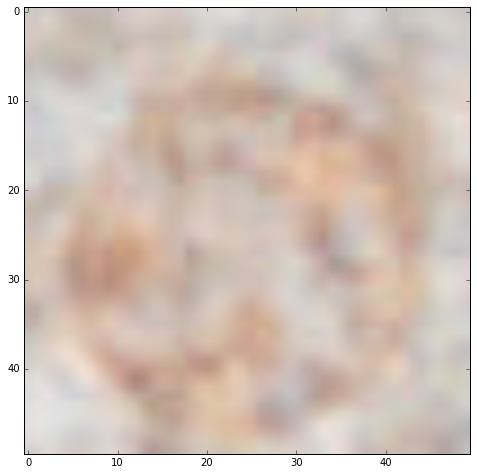

(<matplotlib.image.AxesImage at 0x18eadd68f28>, None)

In [4]:
img = cv2.imread("Dropbox/BrdUImgs/Image (41).tif")
template2 = img[20:70,80:130]
plt.imshow(template2), plt.show()

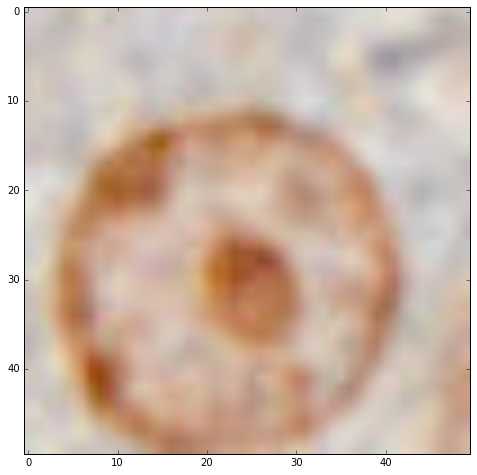

(<matplotlib.image.AxesImage at 0x18eadd889e8>, None)

In [5]:
img = cv2.imread("Dropbox/BrdUImgs/Image (39).tif")
template1 = img[974:1024, 1160:1210]
plt.imshow(template1), plt.show()

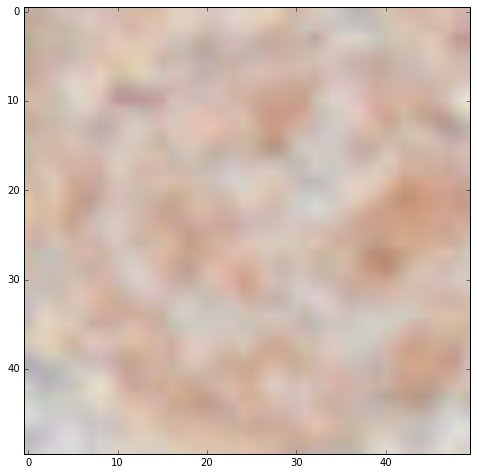

(<matplotlib.image.AxesImage at 0x18eaddf0f28>, None)

In [6]:
img = cv2.imread("Dropbox/BrdUImgs/Image (3).tif")
template = img[25:75,400:450]
plt.imshow(template), plt.show()

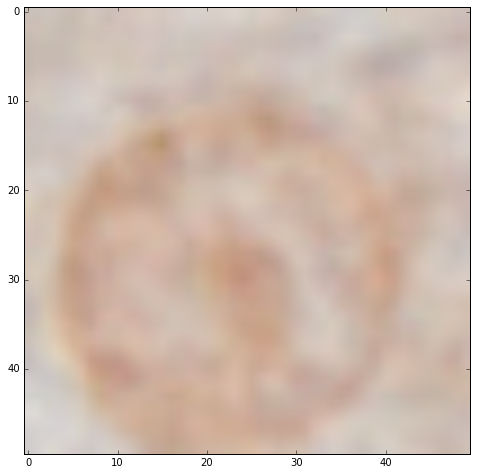

(<matplotlib.image.AxesImage at 0x18eade5d278>, None)

In [7]:
from PIL import Image

# Create a numpy array of floats to store the average (assume RGB images)
arr=np.zeros((50,50,3),np.float)
imlist = [template1, template, template2]
N = len(imlist)

# Build up average pixel intensities, casting each image as an array of floats
for im in imlist:
    imarr=np.array(im,dtype=np.float)
    arr=arr+imarr/N

# Round values in array and cast as 8-bit integer
out=np.array(np.round(arr),np.uint8)

plt.imshow(out), plt.show()

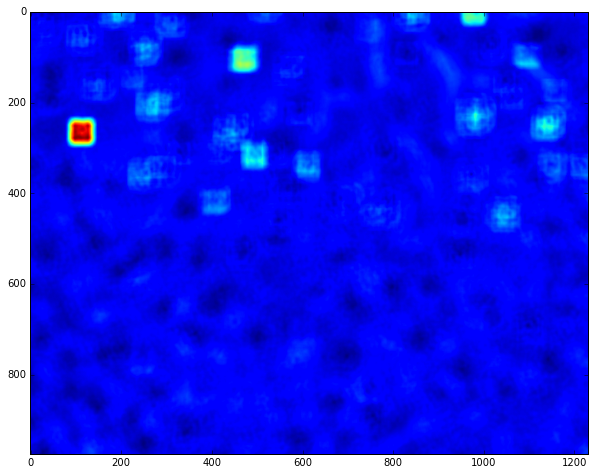

(<matplotlib.image.AxesImage at 0x18eadeb5b38>, None)

In [8]:
i = cv2.imread("Dropbox/BrdUImgs/Image (2).tif")
result = cv2.matchTemplate(i, out, cv2.TM_SQDIFF)
plt.imshow(result), plt.show()

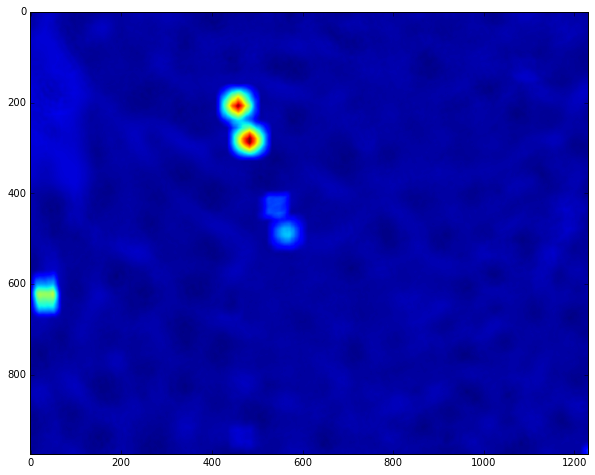

(<matplotlib.image.AxesImage at 0x18eae39a588>, None)

In [9]:
i = cv2.imread("Dropbox/BrdUImgs/Image (3).tif")
result = cv2.matchTemplate(i, out, cv2.TM_SQDIFF)
plt.imshow(result), plt.show()

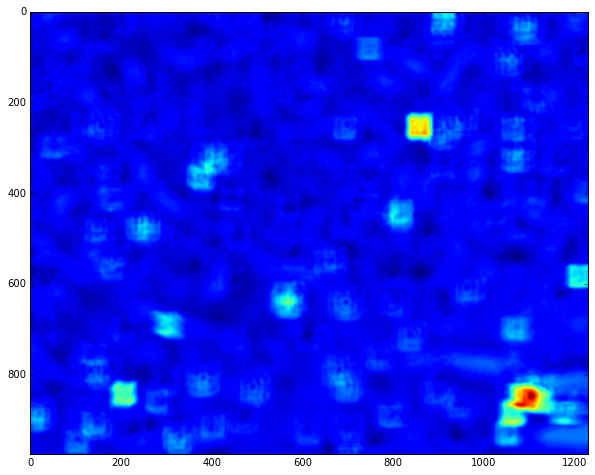

(<matplotlib.image.AxesImage at 0x18eae3fe0f0>, None)

In [10]:
i = cv2.imread("Dropbox/BrdUImgs/Image (4).tif")
result = cv2.matchTemplate(i, out, cv2.TM_SQDIFF)
plt.imshow(result), plt.show()

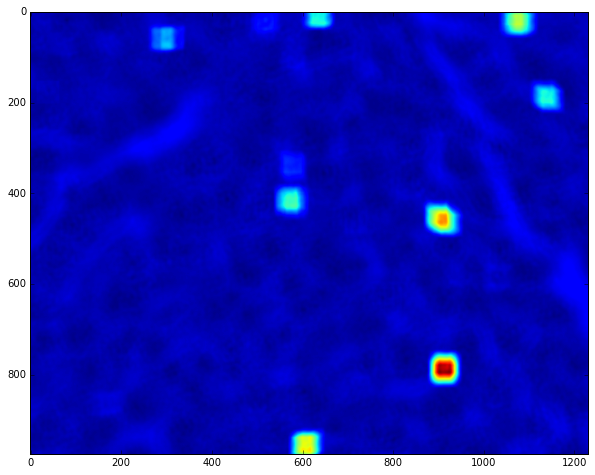

(<matplotlib.image.AxesImage at 0x18eae45dba8>, None)

In [11]:
i = cv2.imread("Dropbox/BrdUImgs/Image (41).tif")
result = cv2.matchTemplate(i, out, cv2.TM_SQDIFF)
plt.imshow(result), plt.show()

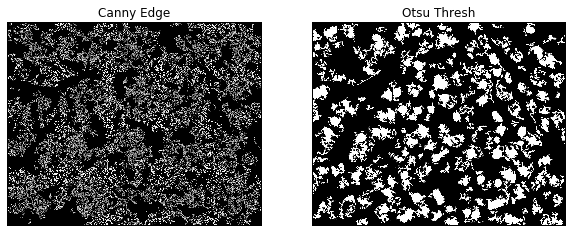

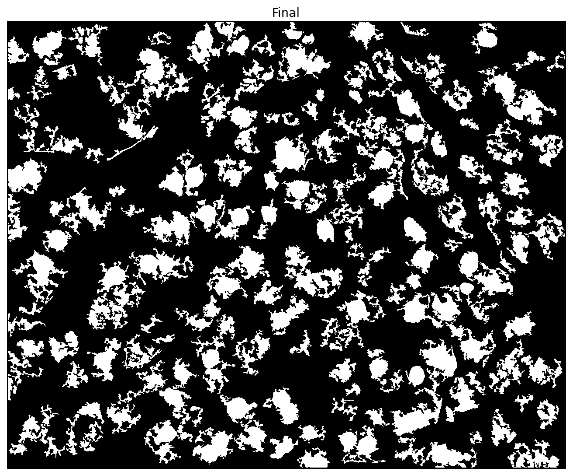

(<matplotlib.image.AxesImage at 0x18eb00749b0>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 None)

In [12]:
img = cv2.imread("Dropbox/BrdUImgs/Image (41).tif",0)
edges = cv2.Canny(img, 0, 190)
plt.subplot(121), plt.imshow(edges, cmap = 'gray'), plt.title("Canny Edge"), plt.xticks([]), plt.yticks([])

thresh = cv2.threshold(img, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
thresh = 255 - thresh
otsu_thresh = np.zeros(thresh.shape, np.uint8)
_, cnt, _ = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
for c in cnt:
    if cv2.contourArea(c) > 300:
        cv2.drawContours(otsu_thresh, [c], 0, 255, -1)
        
plt.subplot(122), plt.imshow(otsu_thresh, cmap = 'gray'), plt.title("Otsu Thresh"), plt.xticks([]), plt.yticks([]), plt.show()

_, otsu_cnt, _ = cv2.findContours(otsu_thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
_, canny_cnt, _ = cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
final = np.zeros(otsu_thresh.shape, np.uint8)
for a in range(len(otsu_cnt)):
    for b in range(len(canny_cnt)):
        for c in range(len(canny_cnt[b])):
            x = canny_cnt[b][c][0][0]
            y = canny_cnt[b][c][0][1]
            points = (x,y)
            num = cv2.pointPolygonTest(otsu_cnt[a],points, False)
            if (num == 0 or num == 1): # and cv2.contourArea(otsu_cnt[a]) > 600:
                cv2.drawContours(final, [otsu_cnt[a]], 0, 255, -1)
                
plt.imshow(final, cmap = 'gray'), plt.title("Final"), plt.xticks([]), plt.yticks([]), plt.show()